In [1]:
# Python 기본 라이브러리
import os
import warnings
from PIL import Image

# PyTorch 및 딥러닝 관련 라이브러리
import torch
from lavis.processors import BlipImageEvalProcessor

# 사용자 정의 모듈
from models import CustomBlip2T5model,remove_module_prefix #커스텀파일

# 경고 무시
warnings.filterwarnings('ignore')

In [2]:
vis_processors = BlipImageEvalProcessor(image_size=560) # 이미지 전처리기 초기화
blipT5_model = CustomBlip2T5model(img_size=560) # BLIP2-T5 모델 초기화

best_state_dict = torch.load(f"output/model_best.pth", map_location='cpu')['model_state_dict'] # 학습된 모델 가중치 불러오기 
best_state_dict = remove_module_prefix(best_state_dict) # 모듈 접두사 제거
blipT5_model.load_state_dict(best_state_dict,strict=False) # 학습된 모델 가중치 적용
del best_state_dict # 메모리 효율을 위해 필요 없는 변수 삭제

Position interpolate from 16x16 to 40x40


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [3]:
# 모델을 GPU로 이동
device = 'cuda' 
blipT5_model.to(device) 

# VQA(Visual Question Answering) 테스트 함수
def perform_visual_qa(image_path, question): 
    # 이미지 불러오기 및 크기 조정
    image = Image.open(image_path)
    image = image.resize((700,500))
    display(image) 
    # 이미지 전처리 및 모델 입력 형태로 변환
    image = vis_processors(image).unsqueeze(0).to(device) 
    
    # 모델을 이용한 답변 생성
    with torch.autocast(device_type="cuda"):
        output = blipT5_model.generate({"image": image, "prompt": question}) 
    print('질문 :', question) 
    print('답변 :', output[0])

In [5]:
# 테스트 이미지 경로 및 질문
image_path = '/data/output_20231211/원천데이터/1.국내_일상_장면/02.여가생활/01.문화생활/0269.소화기/1020102691220230817160257.jpg' 
question = '사진 속에서 마루는 무엇으로 만들어져있나요?'

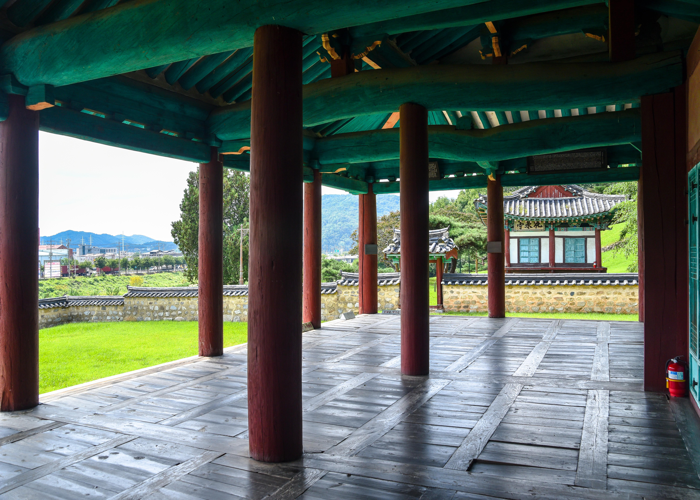

질문 : 사진 속에서 마루는 무엇으로 만들어져있나요?
답변 : 사진 속 마루는 나무로 만들어져 있습니다.


In [6]:
# VQA 테스트 실행
perform_visual_qa(image_path, question)